# Van Der Pol Oscillator

The Van Der Pol oscillator is an example of non-conservative, oscillating system with non-linear damping, governed by the differential Van Der Pol equation:
\begin{equation}
    \ddot{x} + \mu (x^{2} - 1) \dot{x} + x = 0
\end{equation}

where $\mu \geq 0$ is a parameter. The non linear damping term $\mu (x^{2} - 1) \dot{x}$ acts as a positive damping for $|x| > 1$, but as a negative damping for $|x| < 1$, so that it causes large amplitude oscillations to decay but it pumps them back up if they become too small.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def deriv_vdp(t, y, mu):
    '''
    Van der Pol equation
    '''
    return np.array([y[1], -mu * (y[0]**2 - 1)*y[1] - y[0]])

In [3]:
def rk4(t, deriv, y, dt, **kwargs):
    for i in range(len(t)-1):
        k1 = deriv(t[i], y[i][:], **kwargs) * dt
        k2 = deriv(t[i] + dt/2, y[i][:] + k1/2, **kwargs) * dt
        k3 = deriv(t[i] + dt/2, y[i][:] + k2/2,  **kwargs) * dt
        k4 = deriv( t[i], y[i][:] + k3, **kwargs) * dt
        y[i+1][:] = y[i][:] + (k1 + 2*k2 + 2*k3 + k4)/6
    #return y

In [4]:
mu = 1

t0 = 0
tf = 50
dt = 0.01
N = int((tf - t0)/dt)

y = np.zeros([N,2])

y[0][0] = 1

t = np.linspace(t0, tf, N)

In [5]:
rk4(t, deriv_vdp, y, dt, mu=mu)

In [6]:
#y

In [7]:
x = np.transpose(y)[0]
x_dot = np.transpose(y)[1]

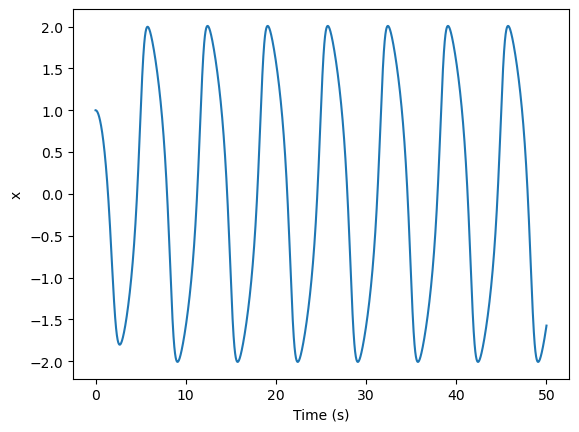

In [8]:
plt.figure()
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('x')
#plt.xlim(0, 30)
plt.show()

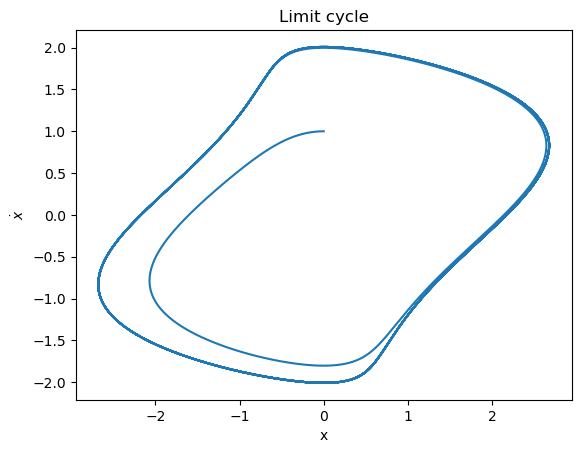

In [9]:
plt.figure()
plt.plot(x_dot, x)
plt.ylabel(r'$\dot{x}$')
plt.xlabel('x')
#plt.xlim(0, 30)
plt.title('Limit cycle')
plt.show()

A **limit cycle** is an isolated closed trajectory. Stable limit cycles model systems that exhibit self-sustained oscillations, i.e. the system oscillates even in the absence of an external periodic forcing.

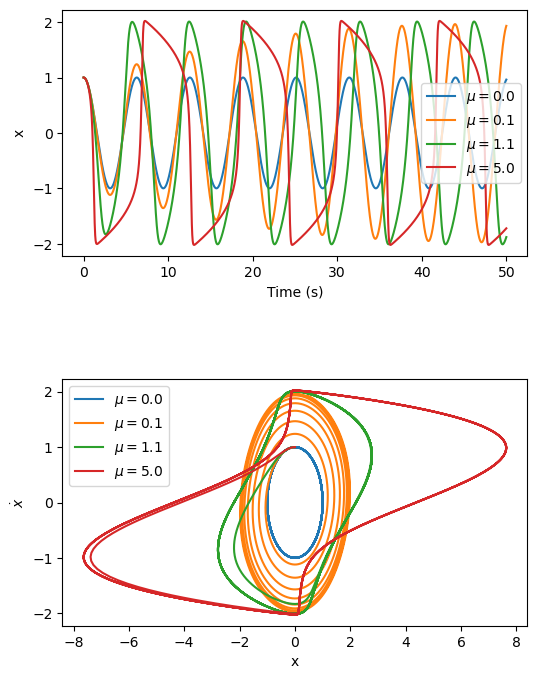

In [10]:
mu_list = np.array([0, 0.1, 1.1, 5])
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6, 8))
fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('x')
ax2.set_ylabel(r'$\dot{x}$')
ax2.set_xlabel('x')
for mu in mu_list:
    rk4(t, deriv_vdp, y, dt, mu=mu)
    ax1.plot(t, np.transpose(y)[0], label = '$\mu=$%s'% mu)
    ax2.plot(np.transpose(y)[1], np.transpose(y)[0], label = '$\mu=$%s'% mu)
ax1.legend()
ax2.legend()
plt.show()

For $\mu = 0$ the Van der Pol oscillator collapses to the case of a simple undampened harmonic oscillator with $\omega = 1$, we can indeed see that the limit cycle is an ellypse in that case.